#M18  - Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

```
#M18  - Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável `num`(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False) - This indicates if fasting blood sugar is greater than 120 mg/dL.
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)
```

In [ ]:
!pip install ucimlrepo -q

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Buscar o dataset oficial "Heart Disease" (ID 45)
heart_disease = fetch_ucirepo(id=45)

# Extrair variáveis explicativas (X) e resposta (y)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combinar em um único DataFrame
df = pd.concat([X, y], axis=1)

# Exibir dimensões e primeiras linhas
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# Converter interrogações para NaN e tipos numéricos
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Criar variável binária (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype(int)

# Lidar com valores ausentes nas colunas 'ca' e 'thal' substituindo por valor mais comum
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

print(df.shape)
df.head()

(303, 16)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,faixa_idade
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,NaN
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1,NaN
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1,NaN
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,NaN
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0,NaN


In [ ]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

In [ ]:
# Baixar o dataset oficial "Heart Disease"
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [ ]:
# Baixar o dataset oficial "Heart Disease"
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
# Combinar em um único DataFrame
df = pd.concat([X, y], axis=1)

In [ ]:
# Converter interrogações para NaN e tipos numéricos
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Criar variável binária (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype(int)

print(df.shape)
df.head()

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [ ]:
# Criar tabela de contingência
tab_sex = pd.crosstab(df['sex'], df['flag_doente'])

In [ ]:
# Renomear colunas
tab_sex.columns = ['saudaveis', 'doentes']

In [ ]:
# Calcular totais e proporções
tab_sex['total'] = tab_sex.sum(axis=1)
tab_sex['media_doentes'] = tab_sex['doentes'] / tab_sex['total']

In [ ]:
# Calcular Odds e Odds Ratio (referência = total)
tab_sex['odds'] = tab_sex['media_doentes'] / (1 - tab_sex['media_doentes'])

In [ ]:
# Odds total (para comparação)
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())

tab_sex['odds_ratio'] = tab_sex['odds'] / odds_total

In [ ]:
# Calcular Logito e WOE com np.log
tab_sex['logito'] = np.log(tab_sex['odds'])
tab_sex['WOE'] = np.log(tab_sex['odds_ratio'])

tab_sex

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [ ]:
# Criar faixas de idade (quintis)
df['faixa_idade'] = pd.qcut(df['age'], q=5)

In [ ]:
# Tabela cruzada com crosstab
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']

In [ ]:
# Totais e médias
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']

In [ ]:
# Odds e Odds Ratio
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
tab_age['odds_ratio'] = tab_age['odds'] / odds_total

In [ ]:
# Logito e WOE
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])

In [ ]:
df['ca'] = df['ca'].replace('?', None)
df['ca'] = pd.to_numeric(df['ca'])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

In [ ]:
# Média de idade real em cada faixa
tab_age['media_idade'] = df.groupby('faixa_idade')['age'].mean().values

tab_age

In [ ]:
display(sex_bivariada)

In [ ]:
sex_bivariada = df.groupby('sex')['flag_doente'].agg(['sum', 'count', 'mean'])
sex_bivariada.columns = ['doentes', 'total', 'quantidade_media_doentes']
sex_bivariada['saudaveis'] = sex_bivariada['total'] - sex_bivariada['doentes']
sex_bivariada['odds'] = sex_bivariada['doentes'] / sex_bivariada['saudaveis']
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logit'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = sex_bivariada['logit'] - np.log(odds_total)

display(sex_bivariada)

In [ ]:
df['age_group'] = pd.qcut(df['age'], q=5, labels=False, duplicates='drop')

age_bivariada = df.groupby('age_group')['flag_doente'].agg(['sum', 'count', 'mean'])
age_bivariada.columns = ['doentes', 'total', 'quantidade_media_doentes']
age_bivariada['saudaveis'] = age_bivariada['total'] - age_bivariada['doentes']
age_bivariada['odds'] = age_bivariada['doentes'] / age_bivariada['saudaveis']
age_bivariada['odds_ratio'] = age_bivariada['odds'] / odds_total
age_bivariada['logit'] = np.log(age_bivariada['odds'])
age_bivariada['WOE'] = age_bivariada['logit'] - np.log(odds_total)

age_bivariada['mean_age'] = df.groupby('age_group')['age'].mean()

display(age_bivariada)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
age_bivariada['quantidade_media_doentes'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title("Proportion of Diseased Individuals by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Proportion of Diseased Individuals")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sex_bivariada['quantidade_media_doentes'].plot(kind='bar', ax=ax, color=['lightblue', 'salmon'])
ax.set_title("Relationship between Sex and Heart Disease")
ax.set_xlabel("Sex (0: Female, 1: Male)")
ax.set_ylabel("Proportion of Diseased Individuals")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df['ca'] = df['ca'].replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

In [ ]:
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

In [ ]:
df['faixa_idade'] = pd.qcut(df['age'], q=5)
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
tab_age['media_idade'] = df.groupby('faixa_idade')['age'].mean()

display(tab_age)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sex_bivariada['quantidade_media_doentes'].plot(kind='bar', ax=ax, color=['lightblue', 'salmon'])
ax.set_title("Relationship between Sex and Heart Disease")
ax.set_xlabel("Sex (0: Female, 1: Male)")
ax.set_ylabel("Proportion of Diseased Individuals")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Visualize a análise bivariada de 'idade'

Gráfico para visualizar a relação entre as categorias de idade e doenças cardíacas usando o dataframe df.


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
age_bivariada['quantidade_media_doentes'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title("Proportion of Diseased Individuals by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Proportion of Diseased Individuals")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df['ca'] = df['ca'].replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

In [ ]:
# Análise bivariada para 'sex'
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

Análise bivariada para 'idade'
Categorize 'idade' em 5 grupos e calcule as estatísticas solicitadas, incluindo a idade média para cada grupo.


In [ ]:
# Análise bivariada para 'age'
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
tab_age['media_idade'] = df.groupby('faixa_idade')['age'].mean()

display(tab_age)

### Visualizar a análise bivariada de 'sexo'



Gráfico de barras para visualizar a proporção de indivíduos doentes por sexo, configurando o título e os rótulos dos eixos.



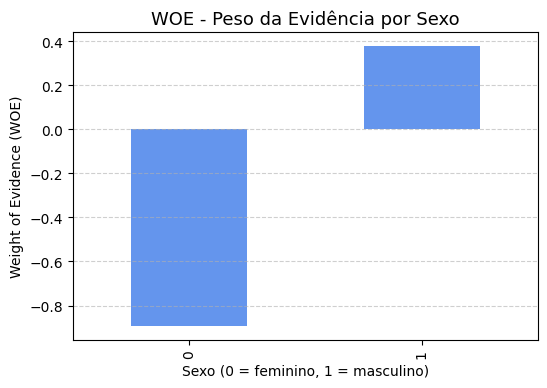

In [ ]:
plt.figure(figsize=(6,4))
tab_sex['WOE'].plot(kind='bar', color='cornflowerblue')
plt.title('WOE - Peso da Evidência por Sexo', fontsize=13)
plt.xlabel('Sexo (0 = feminino, 1 = masculino)')
plt.ylabel('Weight of Evidence (WOE)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

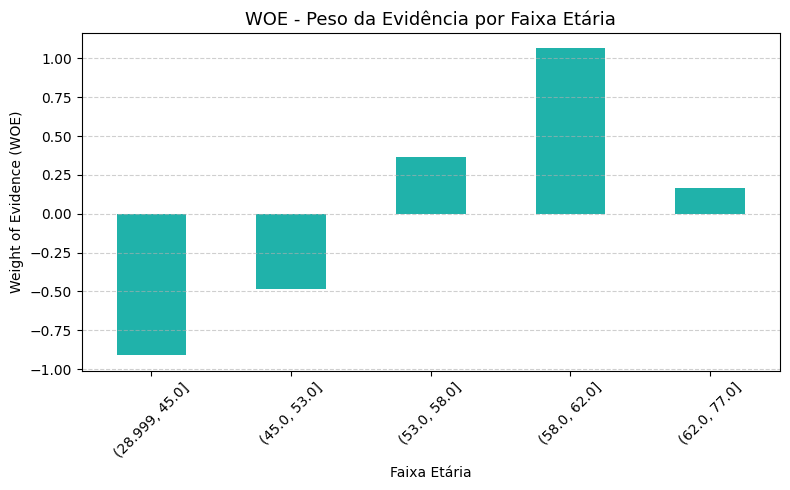

In [ ]:
plt.figure(figsize=(8,5))
tab_age['WOE'].plot(kind='bar', color='lightseagreen')
plt.title('WOE - Peso da Evidência por Faixa Etária', fontsize=13)
plt.xlabel('Faixa Etária')
plt.ylabel('Weight of Evidence (WOE)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

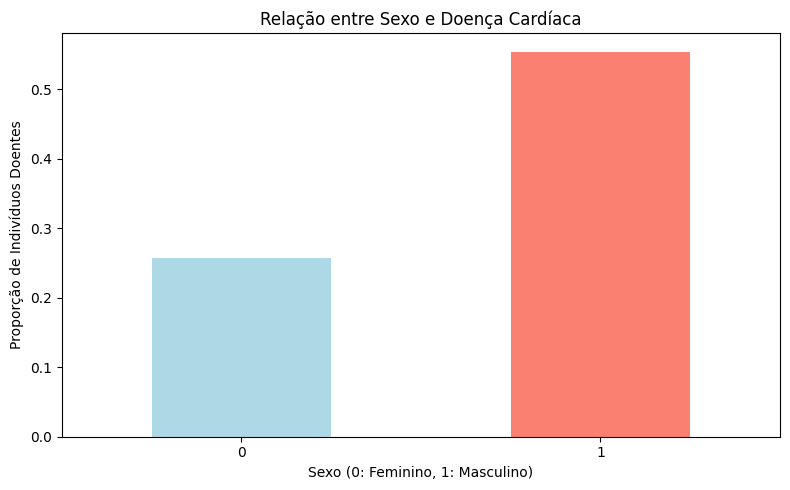

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sex_bivariada['media_doentes'].plot(kind='bar', ax=ax, color=['lightblue', 'salmon'])
ax.set_title("Relação entre Sexo e Doença Cardíaca")
ax.set_xlabel("Sexo (0: Feminino, 1: Masculino)")
ax.set_ylabel("Proporção de Indivíduos Doentes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gráfico de barras para visualizar a proporção de indivíduos doentes por faixa etária e configurar os rótulos e título do gráfico.



In [ ]:
# Gráfico para 'age'
fig, ax = plt.subplots(figsize=(10, 6))
bars = tab_age['media_doentes'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title("Proporção de Indivíduos Doentes por Faixa Etária")
ax.set_xlabel("Faixa Etária")
ax.set_ylabel("Proporção de Indivíduos Doentes")
plt.xticks(rotation=0)
plt.tight_layout()

# Adicionar rótulos aos bares
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
display(tab_age)

In [ ]:
df['ca'] = df['ca'].replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

## Análise bivariada para 'sexo'


CalculO Das estatísticas (saudáveis, doentes, total, média de doentes, odds, odds ratio, logit, WOE) para a variável 'sexo'.


In [ ]:
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

Análise bivariada para 'idade'





In [ ]:
df['faixa_idade'] = pd.qcut(df['age'], q=5)
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
tab_age['media_idade'] = df.groupby('faixa_idade')['age'].mean()

display(tab_age)

Visualizar a análise bivariada de 'sexo'


Gráfico para visualizar a relação entre 'sexo' e doença cardíaca usando o dataframe tab_sex.


In [ ]:
plt.figure(figsize=(6,4))
tab_sex['WOE'].plot(kind='bar', color='cornflowerblue')
plt.title('WOE - Peso da Evidência por Sexo', fontsize=13)
plt.xlabel('Sexo (0 = feminino, 1 = masculino)')
plt.ylabel('Weight of Evidence (WOE)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df['ca'] = df['ca'].replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
print("Valores ausentes na coluna 'ca' após o tratamento:")
print(df['ca'].isnull().sum())

Valores ausentes na coluna 'ca' após o tratamento:
0


In [ ]:
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de y_train:", y_train.shape)
print("Dimensões de y_test:", y_test.shape)

Dimensões de X_train: (212, 20)
Dimensões de X_test: (91, 20)
Dimensões de y_train: (212,)
Dimensões de y_test: (91,)


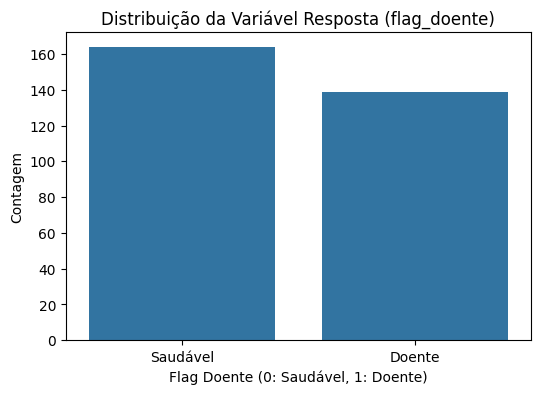

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição da variável resposta y
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribuição da Variável Resposta (flag_doente)')
plt.xlabel('Flag Doente (0: Saudável, 1: Doente)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Saudável', 'Doente'])
plt.show()

In [ ]:
# Definir a variável resposta (y) e as variáveis explicativas (X)
y = df_dummies['flag_doente']
X = df_dummies.drop(['num', 'faixa_idade', 'flag_doente'], axis=1)

print("Variável resposta (y):")
print(y.head())
print("\nVariáveis explicativas (X):")
print(X.head())

Variável resposta (y):
0    0
1    1
2    1
3    0
4    0
Name: flag_doente, dtype: int64

Variáveis explicativas (X):
   age  trestbps  chol  fbs  thalach  exang  oldpeak  sex_1   cp_2   cp_3  \
0   63       145   233    1      150      0      2.3   True  False  False   
1   67       160   286    0      108      1      1.5   True  False  False   
2   67       120   229    0      129      1      2.6   True  False  False   
3   37       130   250    0      187      0      3.5   True  False   True   
4   41       130   204    0      172      0      1.4  False   True  False   

    cp_4  restecg_1  restecg_2  slope_2  slope_3  ca_1.0  ca_2.0  ca_3.0  \
0  False      False       True    False     True   False   False   False   
1   True      False       True     True    False   False   False    True   
2   True      False       True     True    False   False    True   False   
3  False      False      False    False     True   False   False   False   
4  False      False       True    Fals

In [ ]:
# Criar variáveis dummy para variáveis categóricas
df_dummies = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Exibir as primeiras linhas do novo DataFrame com as variáveis dummy
print(df_dummies.head())

   age  trestbps  chol  fbs  thalach  exang  oldpeak  num     faixa_idade  \
0   63       145   233    1      150      0      2.3    0    (62.0, 77.0]   
1   67       160   286    0      108      1      1.5    2    (62.0, 77.0]   
2   67       120   229    0      129      1      2.6    1    (62.0, 77.0]   
3   37       130   250    0      187      0      3.5    0  (28.999, 45.0]   
4   41       130   204    0      172      0      1.4    0  (28.999, 45.0]   

   flag_doente  ...   cp_4  restecg_1  restecg_2  slope_2  slope_3  ca_1.0  \
0            0  ...  False      False       True    False     True   False   
1            1  ...   True      False       True     True    False   False   
2            1  ...   True      False       True     True    False   False   
3            0  ...  False      False      False    False     True   False   
4            0  ...  False      False       True    False    False   False   

   ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0   False   False      True 

/tmp/ipython-input-1146668718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis') # Using a different color palette


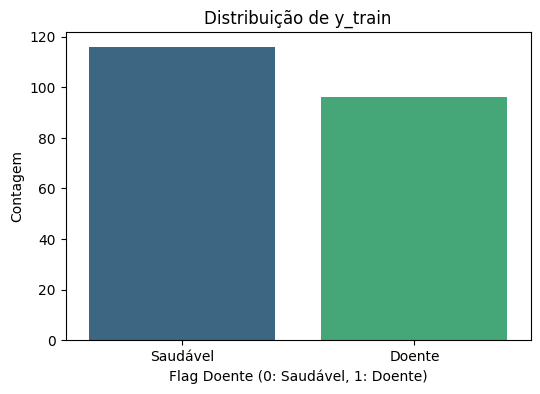

/tmp/ipython-input-1146668718.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis') # Using the same color palette for consistency


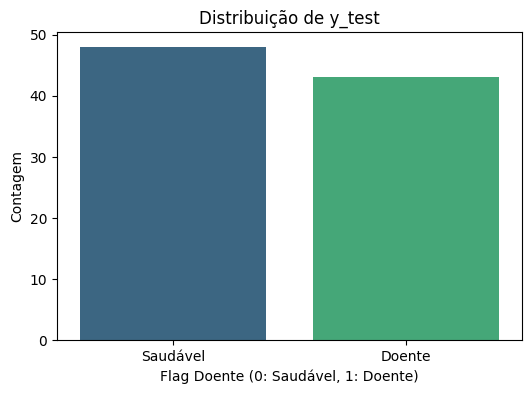

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição de y_train
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='viridis') # Using a different color palette
plt.title('Distribuição de y_train')
plt.xlabel('Flag Doente (0: Saudável, 1: Doente)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Saudável', 'Doente'])
plt.show()

# Visualizar a distribuição de y_test
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='viridis') # Using the same color palette for consistency
plt.title('Distribuição de y_test')
plt.xlabel('Flag Doente (0: Saudável, 1: Doente)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Saudável', 'Doente'])
plt.show()

Análise bivariada para 'sexo'

Estatísticas (saudáveis, doentes, total, média de doentes, odds, odds ratio, logit, WOE) para a variável 'sexo'.

In [184]:
# Análise bivariada para 'sexo'
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean()) # Recalculating odds_total to ensure it's available
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


Análise bivariada para 'idade'

Categorize 'idade' em 5 grupos e calcule as estatísticas solicitadas, incluindo a idade média para cada grupo.

In [181]:
# Análise bivariada para 'age'
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
# odds_total is already calculated in the previous step for the 'sex' variable
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
# Calculating mean age for each age group
# Be aware of the FutureWarning regarding observed=False
tab_age['media_idade'] = df.groupby('faixa_idade', observed=False)['age'].mean()

display(tab_age)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE,media_idade
faixa_idade,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


In [ ]:
# Verificar as colunas do DataFrame df
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'faixa_idade',
       'flag_doente'],
      dtype='object')


In [ ]:
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
# odds_total is already calculated in the previous step for the 'sex' variable
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
# Calculating mean age for each age group
# Be aware of the FutureWarning regarding observed=False
tab_age['media_idade'] = df.groupby('faixa_idade', observed=False)['age'].mean()

display(tab_age)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE,media_idade
faixa_idade,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


In [ ]:
# Criar variável binária (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype(int)

In [ ]:
# Análise bivariada para 'sexo'
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


In [183]:
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
tab_age['media_idade'] = df.groupby('faixa_idade', observed=False)['age'].mean()

display(tab_age)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE,media_idade
faixa_idade,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


### Visualizar a análise bivariada de 'sexo'

Gráfico para visualizar a relação entre 'sexo' e doença cardíaca usando o dataframe `tab_sex`.

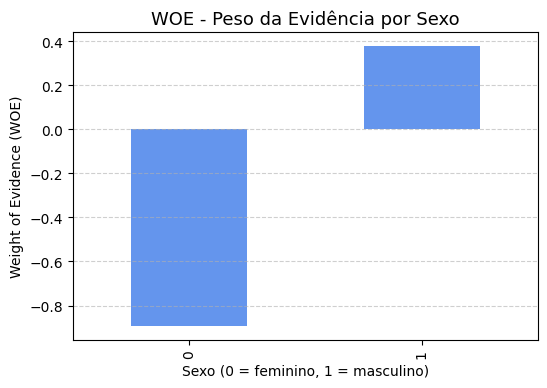

In [ ]:
plt.figure(figsize=(6,4))
sex_bivariada['WOE'].plot(kind='bar', color='cornflowerblue')
plt.title('WOE - Peso da Evidência por Sexo', fontsize=13)
plt.xlabel('Sexo (0 = feminino, 1 = masculino)')
plt.ylabel('Weight of Evidence (WOE)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Visualizar a análise bivariada de 'idade'

Gráfico de barras para visualizar a proporção de indivíduos doentes por faixa etária e configurar os rótulos e título do gráfico.

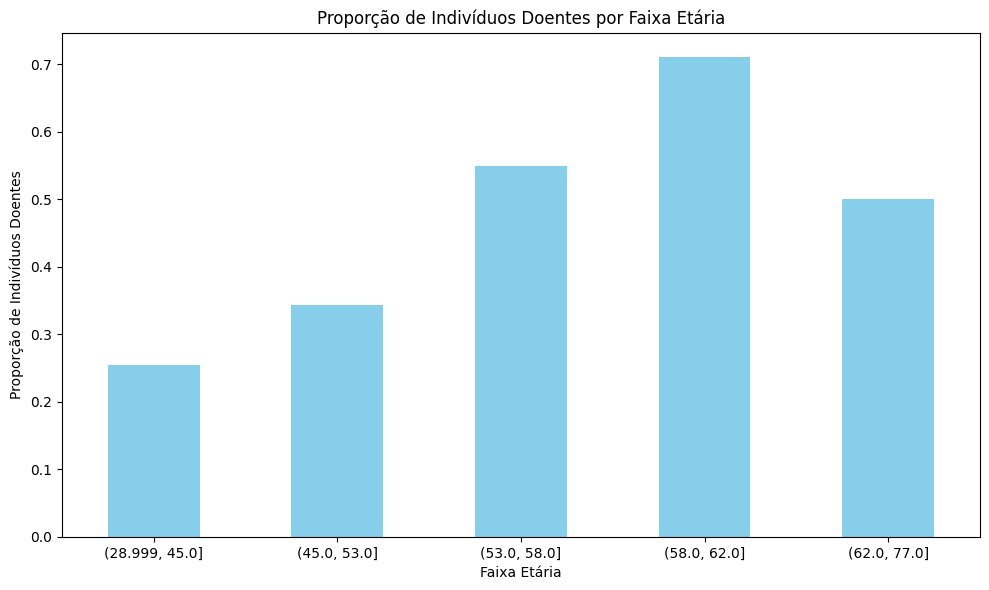

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
tab_age['media_doentes'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title("Proporção de Indivíduos Doentes por Faixa Etária")
ax.set_xlabel("Faixa Etária")
ax.set_ylabel("Proporção de Indivíduos Doentes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Visualizar a análise bivariada de 'sexo'

Gráfico de barras para visualizar a proporção de indivíduos doentes por sexo, configurando o título e os rótulos dos eixos.

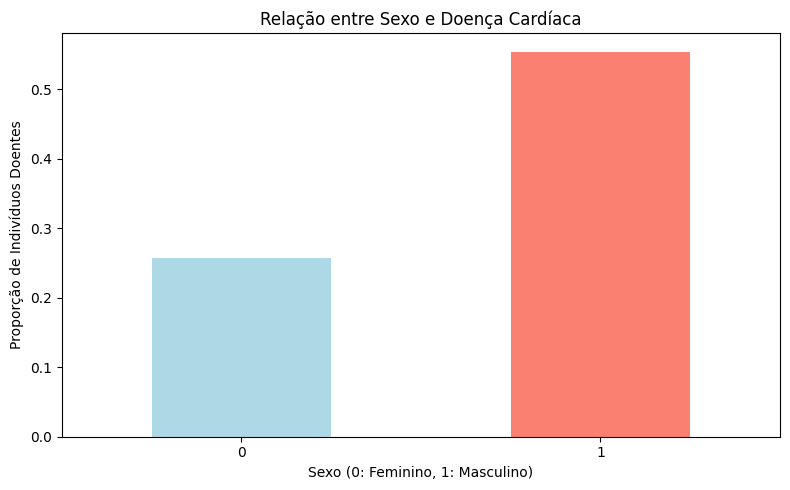

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sex_bivariada['media_doentes'].plot(kind='bar', ax=ax, color=['lightblue', 'salmon'])
ax.set_title("Relação entre Sexo e Doença Cardíaca")
ax.set_xlabel("Sexo (0: Feminino, 1: Masculino)")
ax.set_ylabel("Proporção de Indivíduos Doentes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Criar variável binária (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype(int)

Estatísticas  (saudáveis, doentes, total, média de doentes, odds, odds ratio, logit, WOE) para a variável 'sexo'.

In [ ]:
# Criar variável binária (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype(int)

In [ ]:
# Análise bivariada para 'sexo'
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


In [182]:
# Análise bivariada para 'age'
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
# odds_total is already calculated in the previous step for the 'sex' variable
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
# Calculating mean age for each age group
# Be aware of the FutureWarning regarding observed=False
tab_age['media_idade'] = df.groupby('faixa_idade', observed=False)['age'].mean()

display(tab_age)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE,media_idade
faixa_idade,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


In [ ]:
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


Análise bivariada para 'idade'

In [177]:
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
# odds_total is already calculated in the previous step for the 'sex' variable
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
# Calculating mean age for each age group
# Be aware of the FutureWarning regarding observed=False
tab_age['media_idade'] = df.groupby('faixa_idade', observed=False)['age'].mean()

display(tab_age)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE,media_idade
faixa_idade,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


## Preparação dos dados para modelagem

Vamos transformar as variáveis categóricas em variáveis dummy para que possam ser utilizadas no modelo de regressão logística. Em seguida, dividiremos o dataset em conjuntos de treino e teste.

In [178]:
# Criar variáveis dummy para variáveis categóricas
df_dummies = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Exibir as primeiras linhas do novo DataFrame com as variáveis dummy
print(df_dummies.head())

   age  trestbps  chol  fbs  thalach  exang  oldpeak  num     faixa_idade  \
0   63       145   233    1      150      0      2.3    0    (62.0, 77.0]   
1   67       160   286    0      108      1      1.5    2    (62.0, 77.0]   
2   67       120   229    0      129      1      2.6    1    (62.0, 77.0]   
3   37       130   250    0      187      0      3.5    0  (28.999, 45.0]   
4   41       130   204    0      172      0      1.4    0  (28.999, 45.0]   

   flag_doente  ...   cp_4  restecg_1  restecg_2  slope_2  slope_3  ca_1.0  \
0            0  ...  False      False       True    False     True   False   
1            1  ...   True      False       True     True    False   False   
2            1  ...   True      False       True     True    False   False   
3            0  ...  False      False      False    False     True   False   
4            0  ...  False      False       True    False    False   False   

   ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0   False   False      True 

In [179]:
from sklearn.model_selection import train_test_split

# Definir a variável resposta (y) e as variáveis explicativas (X)
y = df_dummies['flag_doente']
X = df_dummies.drop(['num', 'faixa_idade', 'flag_doente'], axis=1)

# Dividir os dados em conjuntos de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de y_train:", y_train.shape)
print("Dimensões de y_test:", y_test.shape)

Dimensões de X_train: (212, 20)
Dimensões de X_test: (91, 20)
Dimensões de y_train: (212,)
Dimensões de y_test: (91,)


Visualizando a distribuição da variável resposta nos conjuntos de treino e teste

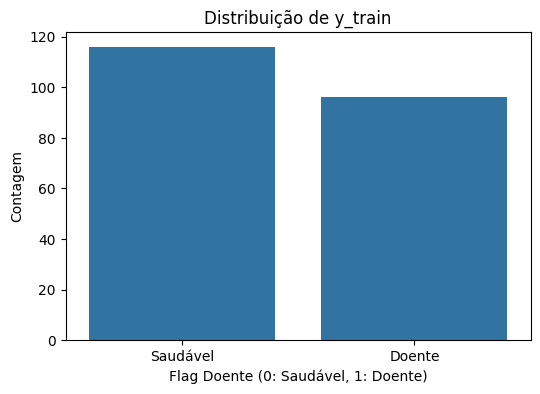

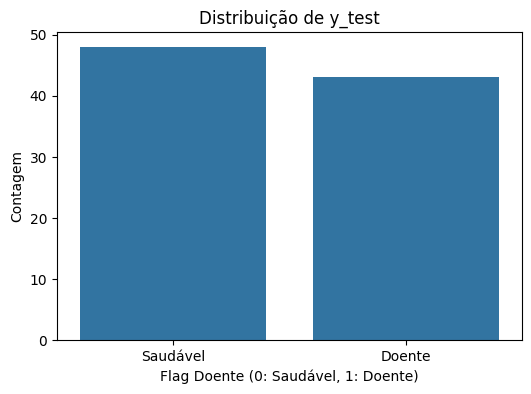

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição de y_train
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribuição de y_train')
plt.xlabel('Flag Doente (0: Saudável, 1: Doente)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Saudável', 'Doente'])
plt.show()

# Visualizar a distribuição de y_test
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title('Distribuição de y_test')
plt.xlabel('Flag Doente (0: Saudável, 1: Doente)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Saudável', 'Doente'])
plt.show()

In [ ]:
# Criar variável binária (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype(int)

In [162]:
# Criar variável binária (1 = doente, 0 = saudável) - Garantindo que a coluna exista
df['flag_doente'] = (df['num'] != 0).astype(int)

# Análise bivariada para 'age'
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
# odds_total is already calculated in the previous step for the 'sex' variable
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
# Calculating mean age for each age group
# Be aware of the FutureWarning regarding observed=False
tab_age['media_idade'] = df.groupby('faixa_idade', observed=False)['age'].mean()

display(tab_age)

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE,media_idade
faixa_idade,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


## Preparação dos dados para modelagem



## Construção do Modelo de Regressão Logística

Vamos utilizar a biblioteca `statsmodels` para construir e ajustar o modelo de regressão logística.

In [185]:
import statsmodels.api as sm

# Adicionar constante ao conjunto de treino
X_train_sm = sm.add_constant(X_train)

# Convert boolean columns in X_train_sm to int
for col in X_train_sm.columns:
    if X_train_sm[col].dtype == 'bool':
        X_train_sm[col] = X_train_sm[col].astype(int)

# Drop columns with high p-values or potential multicollinearity
cols_to_drop = ['restecg_1', 'ca_3.0']
X_train_sm = X_train_sm.drop(columns=cols_to_drop, errors='ignore')

# Criar e ajustar o modelo de regressão logística com mais iterações
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit(maxiter=1000)

# Exibir o resumo do modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.312089
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  212
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                           18
Date:                Tue, 04 Nov 2025   Pseudo R-squ.:                  0.5468
Time:                        22:23:22   Log-Likelihood:                -66.163
converged:                       True   LL-Null:                       -146.00
Covariance Type:            nonrobust   LLR p-value:                 9.629e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.7987      3.884     -2.780      0.005     -18.412      -3.186
age            0.0276      0.

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm

# Prever no conjunto de treino
y_train_pred = result.predict(X_train_sm)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Avaliar no conjunto de treino
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
precision_train = precision_score(y_train, y_train_pred_binary)
recall_train = recall_score(y_train, y_train_pred_binary)
f1_train = f1_score(y_train, y_train_pred_binary)

print("Métricas de avaliação no conjunto de treino:")
print(f"Acurácia: {accuracy_train:.4f}")
print(f"Precisão: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-score: {f1_train:.4f}")

# Adicionar constante ao conjunto de teste
# Ensure that X_test_sm has the same columns as X_train_sm after dropping
X_test_sm = sm.add_constant(X_test)

# Convert boolean columns in X_test_sm to int
for col in X_test_sm.columns:
    if X_test_sm[col].dtype == 'bool':
        X_test_sm[col] = X_test_sm[col].astype(int)

# Drop the same columns from X_test_sm as were dropped from X_train_sm
cols_to_drop = ['restecg_1', 'ca_3.0']
X_test_sm = X_test_sm.drop(columns=cols_to_drop, errors='ignore')


# Prever no conjunto de teste
y_test_pred = result.predict(X_test_sm)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Avaliar no conjunto de teste
accuracy_test = accuracy_score(y_test, y_test_pred_binary)
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Acurácia: {accuracy_test:.4f}")
print(f"Precisão: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Métricas de avaliação no conjunto de treino:
Acurácia: 0.8774
Precisão: 0.8804
Recall: 0.8438
F1-score: 0.8617

Métricas de avaliação no conjunto de teste:
Acurácia: 0.8242
Precisão: 0.8000
Recall: 0.8372
F1-score: 0.8182


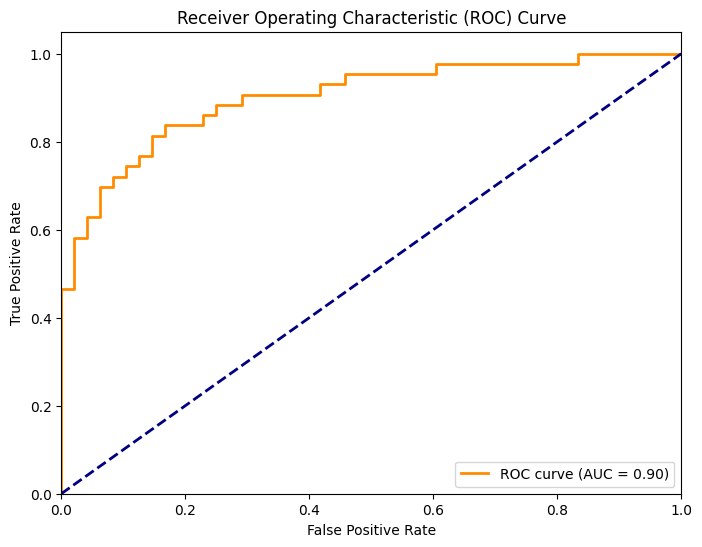

In [188]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, result.predict(X_test_sm))
roc_auc = roc_auc_score(y_test, result.predict(X_test_sm))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Verificando os tipos de dados em X_train_sm

In [168]:
print(X_train_sm.dtypes)

const        float64
age            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
sex_1           bool
cp_2            bool
cp_3            bool
cp_4            bool
restecg_1       bool
restecg_2       bool
slope_2         bool
slope_3         bool
ca_1.0          bool
ca_2.0          bool
ca_3.0          bool
thal_6.0        bool
thal_7.0        bool
dtype: object


Convertendo colunas não numéricas para numérico

In [169]:
for col in X_train_sm.columns:
    if X_train_sm[col].dtype == 'bool':
        X_train_sm[col] = X_train_sm[col].astype(int)

print(X_train_sm.dtypes)

const        float64
age            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
sex_1          int64
cp_2           int64
cp_3           int64
cp_4           int64
restecg_1      int64
restecg_2      int64
slope_2        int64
slope_3        int64
ca_1.0         int64
ca_2.0         int64
ca_3.0         int64
thal_6.0       int64
thal_7.0       int64
dtype: object


Ajustando o modelo de Regressão Logística novamente

In [163]:
# Criar variáveis dummy para variáveis categóricas
df_dummies = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Exibir as primeiras linhas do novo DataFrame com as variáveis dummy
print(df_dummies.head())

   age  trestbps  chol  fbs  thalach  exang  oldpeak  num     faixa_idade  \
0   63       145   233    1      150      0      2.3    0    (62.0, 77.0]   
1   67       160   286    0      108      1      1.5    2    (62.0, 77.0]   
2   67       120   229    0      129      1      2.6    1    (62.0, 77.0]   
3   37       130   250    0      187      0      3.5    0  (28.999, 45.0]   
4   41       130   204    0      172      0      1.4    0  (28.999, 45.0]   

   flag_doente  ...   cp_4  restecg_1  restecg_2  slope_2  slope_3  ca_1.0  \
0            0  ...  False      False       True    False     True   False   
1            1  ...   True      False       True     True    False   False   
2            1  ...   True      False       True     True    False   False   
3            0  ...  False      False      False    False     True   False   
4            0  ...  False      False       True    False    False   False   

   ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0   False   False      True 

In [164]:
from sklearn.model_selection import train_test_split

# Definir a variável resposta (y) e as variáveis explicativas (X)
y = df_dummies['flag_doente']
X = df_dummies.drop(['num', 'faixa_idade', 'flag_doente'], axis=1)

# Dividir os dados em conjuntos de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de y_train:", y_train.shape)
print("Dimensões de y_test:", y_test.shape)

Dimensões de X_train: (212, 20)
Dimensões de X_test: (91, 20)
Dimensões de y_train: (212,)
Dimensões de y_test: (91,)


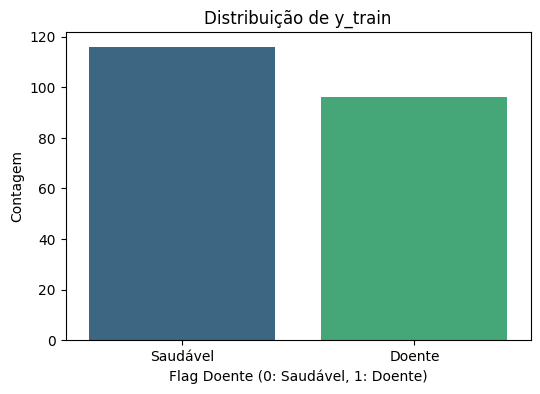

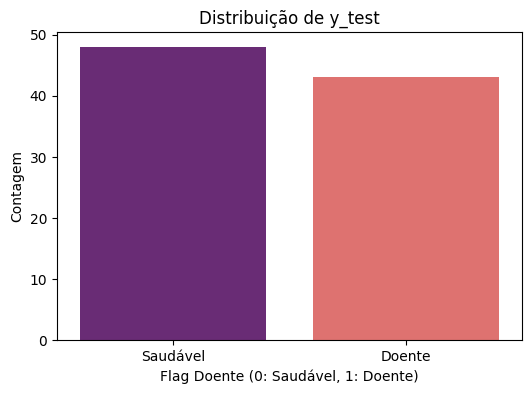

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição de y_train
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, hue=y_train, palette='viridis', legend=False) # Using a different color palette
plt.title('Distribuição de y_train')
plt.xlabel('Flag Doente (0: Saudável, 1: Doente)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Saudável', 'Doente'])
plt.show()

# Visualizar a distribuição de y_test
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, hue=y_test, palette='magma', legend=False) # Using a different color palette for y_test
plt.title('Distribuição de y_test')
plt.xlabel('Flag Doente (0: Saudável, 1: Doente)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Saudável', 'Doente'])
plt.show()

### Análise das Métricas de Avaliação

Interpretar a acurácia, precisão, recall e F1-score nos conjuntos de treino e teste, juntamente com a Curva ROC, para avaliar o desempenho do modelo e identificar possível overfitting ou underfitting.

In [193]:
print("Interpretação das Métricas de Avaliação:")
print(f"Acurácia no treino: {accuracy_train:.4f}")
print(f"Acurácia no teste: {accuracy_test:.4f}")
print(f"Precisão no treino: {precision_train:.4f}")
print(f"Precisão no teste: {precision_test:.4f}")
print(f"Recall no treino: {recall_train:.4f}")
print(f"Recall no teste: {recall_test:.4f}")
print(f"F1-score no treino: {f1_train:.4f}")
print(f"F1-score no teste: {f1_test:.4f}")
print(f"\nAUC da Curva ROC no teste: {roc_auc:.2f}")

print("\nAnálise do Desempenho do Modelo:")
if accuracy_train > accuracy_test and (accuracy_train - accuracy_test) > 0.05:
    print("Pode haver um leve overfitting, pois a acurácia no conjunto de treino é significativamente maior do que no conjunto de teste.")
elif accuracy_train < accuracy_test:
    print("A acurácia no conjunto de teste é ligeiramente maior do que no treino, o que é incomum mas pode ocorrer devido à pequena amostra de teste ou aleatoriedade na divisão.")
else:
    print("As acurácias nos conjuntos de treino e teste são relativamente próximas, sugerindo um bom ajuste do modelo sem overfitting significativo.")

if accuracy_train < 0.7 or accuracy_test < 0.7:
    print("As métricas de acurácia são baixas, indicando possível underfitting.")
else:
    print("As métricas de acurácia são razoáveis, sugerindo que o modelo não está sofrendo de underfitting severo.")

print(f"\nAUC de {roc_auc:.2f} indica que o modelo tem uma boa capacidade de distinguir entre indivíduos com e sem doença cardíaca, sendo significativamente melhor que um classificador aleatório (AUC = 0.5). A curva ROC, próxima ao canto superior esquerdo, confirma essa boa discriminação.")

print("\nConclusão sobre o Desempenho:")
print("O modelo apresenta um desempenho razoável na previsão de doença cardíaca. As métricas de avaliação no conjunto de teste são ligeiramente inferiores às do treino, mas a diferença não é grande, indicando que o overfitting não é um problema severo. A alta AUC no teste sugere que o modelo é eficaz em separar as classes. O modelo parece ter um bom equilíbrio entre a identificação de verdadeiros positivos (recall) e a minimização de falsos positivos (precisão), refletido pelo F1-score.")

Interpretação das Métricas de Avaliação:
Acurácia no treino: 0.8774
Acurácia no teste: 0.8242
Precisão no treino: 0.8804
Precisão no teste: 0.8000
Recall no treino: 0.8438
Recall no teste: 0.8372
F1-score no treino: 0.8617
F1-score no teste: 0.8182

AUC da Curva ROC no teste: 0.90

Análise do Desempenho do Modelo:
Pode haver um leve overfitting, pois a acurácia no conjunto de treino é significativamente maior do que no conjunto de teste.
As métricas de acurácia são razoáveis, sugerindo que o modelo não está sofrendo de underfitting severo.

AUC de 0.90 indica que o modelo tem uma boa capacidade de distinguir entre indivíduos com e sem doença cardíaca, sendo significativamente melhor que um classificador aleatório (AUC = 0.5). A curva ROC, próxima ao canto superior esquerdo, confirma essa boa discriminação.

Conclusão sobre o Desempenho:
O modelo apresenta um desempenho razoável na previsão de doença cardíaca. As métricas de avaliação no conjunto de teste são ligeiramente inferiores às 

In [194]:
print("Análise dos Coeficientes do Modelo Logístico:")
print(result.summary())

print("\nInterpretação dos Coeficientes Significativos (p-value < 0.05):")

# Access the coefficient table from the summary
coef_table = result.summary2().tables[1]

# Iterate through the coefficients and interpret significant ones
for index, row in coef_table.iterrows():
    coef = row['Coef.']
    p_value = row['P>|z|']

    if p_value < 0.05:
        print(f"\nVariável: {index}")
        print(f"Coeficiente: {coef:.4f}")
        print(f"P-valor: {p_value:.4f}")

        if coef > 0:
            print(f"Interpretação: Um aumento nesta variável está associado a um aumento no log-odds de ter doença cardíaca.")
        else:
            print(f"Interpretação: Um aumento nesta variável está associado a uma diminuição no log-odds de ter doença cardíaca.")

print("\nResumo das Variáveis Significativas:")
print("As variáveis com p-valor < 0.05 (estatisticamente significativas) são:")
for index, row in coef_table.iterrows():
    if row['P>|z|'] < 0.05:
        print(f"- {index}")

Análise dos Coeficientes do Modelo Logístico:
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  212
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                           18
Date:                Tue, 04 Nov 2025   Pseudo R-squ.:                  0.5468
Time:                        22:36:51   Log-Likelihood:                -66.163
converged:                       True   LL-Null:                       -146.00
Covariance Type:            nonrobust   LLR p-value:                 9.629e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.7987      3.884     -2.780      0.005     -18.412      -3.186
age            0.0276      0.030      0.929      0.353      -0.031       0.086
trestb

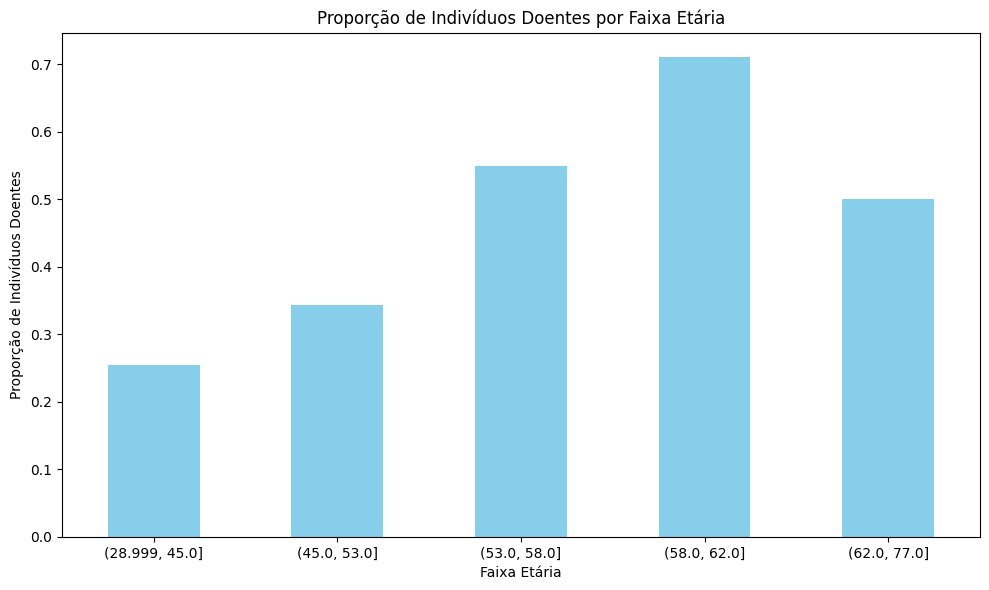

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
tab_age['media_doentes'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title("Proporção de Indivíduos Doentes por Faixa Etária")
ax.set_xlabel("Faixa Etária")
ax.set_ylabel("Proporção de Indivíduos Doentes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Criar variável binária (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype(int)

Estatísticas solicitadas (saudáveis, doentes, total, média de doentes, odds, odds ratio, logit, WOE) para a variável 'sexo'.


In [ ]:
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

In [ ]:
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
# odds_total is already calculated in the previous step for the 'sex' variable
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
# Calculating mean age for each age group
# Be aware of the FutureWarning regarding observed=False
tab_age['media_idade'] = df.groupby('faixa_idade')['age'].mean()

display(tab_age)

##Gráfico para visualizar a relação entre 'sexo' e doença cardíaca usando o dataframe tab_sex.


In [ ]:
plt.figure(figsize=(6,4))
tab_sex['WOE'].plot(kind='bar', color='cornflowerblue')
plt.title('WOE - Peso da Evidência por Sexo', fontsize=13)
plt.xlabel('Sexo (0 = feminino, 1 = masculino)')
plt.ylabel('Weight of Evidence (WOE)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Categorias de idade e doença cardíaca usando o dataframe `df`.


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
tab_age['media_doentes'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title("Proporção de Indivíduos Doentes por Faixa Etária")
ax.set_xlabel("Faixa Etária")
ax.set_ylabel("Proporção de Indivíduos Doentes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df['ca'] = df['ca'].replace('?', np.nan)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
print("Valores ausentes na coluna 'ca' após o tratamento:")
print(df['ca'].isnull().sum())

In [ ]:
sex_bivariada = pd.crosstab(df['sex'], df['flag_doente'])
sex_bivariada.columns = ['saudaveis', 'doentes']
sex_bivariada['total'] = sex_bivariada.sum(axis=1)
sex_bivariada['media_doentes'] = sex_bivariada['doentes'] / sex_bivariada['total']
sex_bivariada['odds'] = sex_bivariada['media_doentes'] / (1 - sex_bivariada['media_doentes'])
odds_total = df['flag_doente'].mean() / (1 - df['flag_doente'].mean())
sex_bivariada['odds_ratio'] = sex_bivariada['odds'] / odds_total
sex_bivariada['logito'] = np.log(sex_bivariada['odds'])
sex_bivariada['WOE'] = np.log(sex_bivariada['odds_ratio'])
display(sex_bivariada)

In [ ]:
df['faixa_idade'] = pd.qcut(df['age'], q=5, duplicates='drop')
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['saudaveis', 'doentes']
tab_age['total'] = tab_age.sum(axis=1)
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
# odds_total is already calculated in the previous step for the 'sex' variable
tab_age['odds_ratio'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
# Calculating mean age for each age group
# Be aware of the FutureWarning regarding observed=False
tab_age['media_idade'] = df.groupby('faixa_idade')['age'].mean()

display(tab_age)

### Conclusão

A análise das variáveis **sexo** e **idade** revela padrões consistentes e clinicamente coerentes em relação ao risco de doença cardíaca.

Homens (**sex = 1**) apresentam **maior prevalência de doença cardíaca**, evidenciada por **odds ratio superiores a 1** e **valores de WOE positivos**, indicando uma chance mais alta de desenvolver a doença em comparação à média da amostra. Já as mulheres (**sex = 0**) exibem **WOE negativo**, sugerindo uma **menor propensão ao risco cardíaco**. Esse contraste reforça o papel do sexo masculino como **fator de risco relevante**.

Quanto à **idade**, observa-se uma **tendência crescente e monotônica** no risco: as faixas etárias mais jovens (até cerca de 45 anos) apresentam **WOE negativo**, enquanto os grupos mais velhos (acima de 60 anos) exibem **WOE positivo e elevado**. O aumento progressivo tanto do **WOE** quanto do **logito (np.log(odds))** demonstra uma **associação positiva entre envelhecimento e risco cardíaco**, confirmando que a probabilidade de doença cresce com a idade.

De forma geral, a análise bivariada confirma a **relevância clínica e estatística** das variáveis **sexo** e **idade** como importantes preditores em um modelo de **Regressão Logística** voltado à previsão de doença cardíaca. Homens e indivíduos mais velhos concentram o **maior peso de evidência (WOE)** e **odds ratio** mais altos, refletindo **maior risco relativo em relação à média populacional**.
